<a href="https://colab.research.google.com/github/IshantWadhwa4/COVID-19-EDA/blob/master/Race_Chart_Matplot_covid19_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [0]:
## Data URL https://www.kaggle.com/sudalairajkumar/covid19-in-india#covid_19_india.csv

data= pd.read_csv('covid_19_india.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       1157 non-null   int64 
 1   Date                      1157 non-null   object
 2   Time                      1157 non-null   object
 3   State/UnionTerritory      1157 non-null   object
 4   ConfirmedIndianNational   1157 non-null   object
 5   ConfirmedForeignNational  1157 non-null   object
 6   Cured                     1157 non-null   int64 
 7   Deaths                    1157 non-null   int64 
 8   Confirmed                 1157 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 81.5+ KB


In [0]:
data.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'],axis = 1,inplace=True )

In [6]:
data.head()

,Date,State/UnionTerritory,Confirmed
0,30/01/20,Kerala,1
1,31/01/20,Kerala,1
2,01/02/20,Kerala,2
3,02/02/20,Kerala,3
4,03/02/20,Kerala,3


In [0]:
last_date = '20/04/20'
data_10 = data[data['Date'] == last_date].sort_values(by='Confirmed',ascending = False).head(10)

In [10]:
data_10

,Date,State/UnionTerritory,Confirmed
1142,20/04/20,Maharashtra,4203
1131,20/04/20,Delhi,2003
1133,20/04/20,Gujarat,1851
1141,20/04/20,Madhya Pradesh,1485
1150,20/04/20,Rajasthan,1478
1151,20/04/20,Tamil Nadu,1477
1155,20/04/20,Uttar Pradesh,1176
1152,20/04/20,Telengana,873
1125,20/04/20,Andhra Pradesh,722
1139,20/04/20,Kerala,402


<BarContainer object of 10 artists>

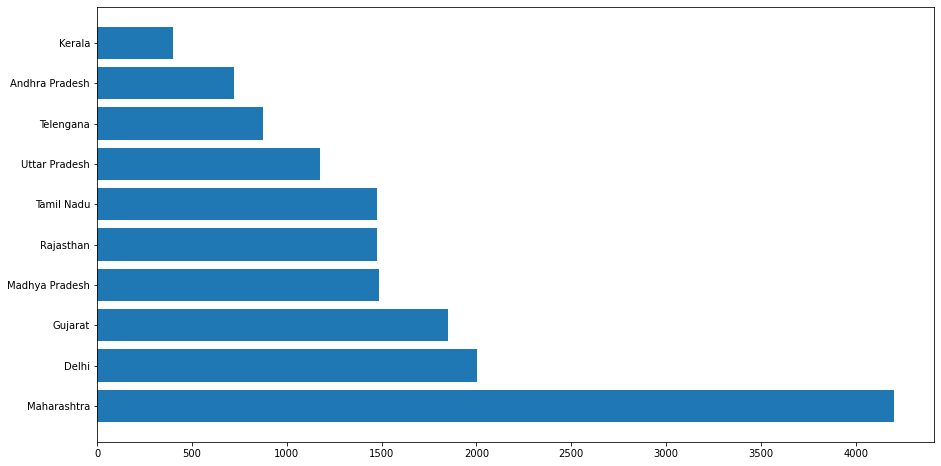

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(data_10['State/UnionTerritory'], data_10['Confirmed'])

In [0]:
colors = dict(zip(
    list(data['State/UnionTerritory'].unique()),
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50','#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50','#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50','#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))

Text(1, 0.4, '20/04/20')

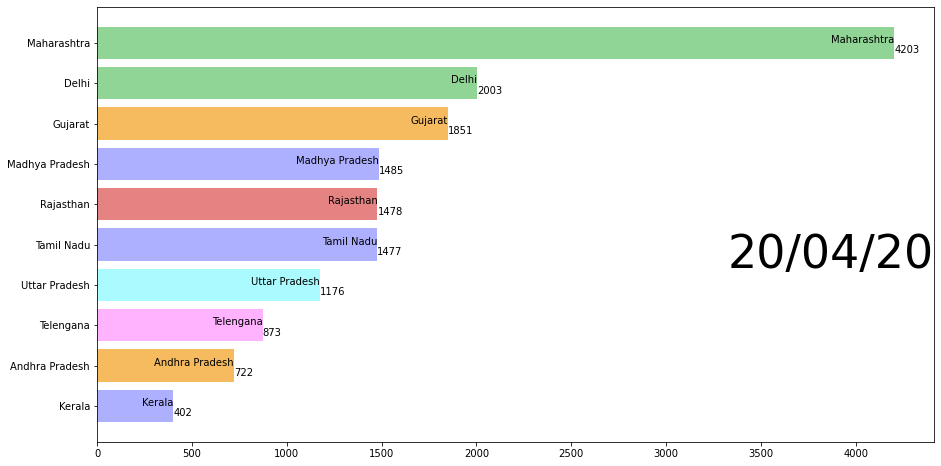

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
data_10 = data_10[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(data_10['State/UnionTerritory'], data_10['Confirmed'], color=[colors[x] for x in data_10['State/UnionTerritory']])

for i, (name, value) in enumerate(zip(data_10['State/UnionTerritory'], data_10['Confirmed'])):
    ax.text(value, i,     name,            ha='right')  
    ax.text(value, i-.25,     value,           ha='left')   

ax.text(1, 0.4, last_date, transform=ax.transAxes, size=46, ha='right')

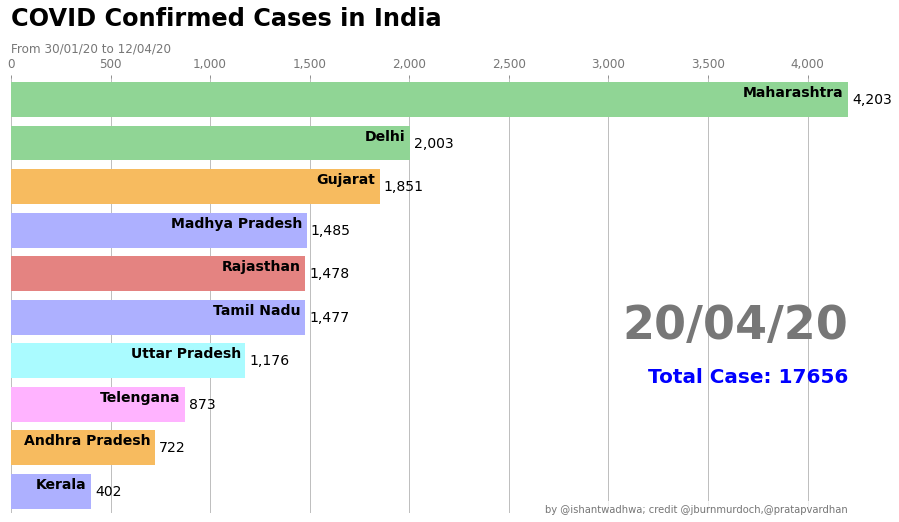

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(date):
  data_10 = data[data['Date'].eq(date)].sort_values(by='Confirmed',ascending = True).tail(10)
  ax.clear()
  ax.barh(data_10['State/UnionTerritory'], data_10['Confirmed'], color=[colors[x] for x in data_10['State/UnionTerritory']])
  dx = data_10['Confirmed'].max() / 200
  for i, (name, value) in enumerate(zip(data_10['State/UnionTerritory'], data_10['Confirmed'])):
    ax.text(value-dx, i,     name,            size=14, weight=600, ha='right', va='bottom')  
    ax.text(value+dx, i,     f'{value:,.0f}',          size=14, ha='left',  va='center')
  ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
  ax.text(1, 0.3, 'Total Case: ' + str(data[data['Date'] == date]['Confirmed'].sum()), transform=ax.transAxes, color='blue', size=20, ha='right', weight=800)  
  ax.text(0, 1.06, 'From 30/01/20 to 12/04/20', transform=ax.transAxes, size=12, color='#777777')
  ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
  ax.xaxis.set_ticks_position('top')
  ax.tick_params(axis='x', colors='#777777', labelsize=12)
  ax.set_yticks([])
  ax.margins(0, 0.01)
  ax.grid(which='major', axis='x', linestyle='-')
  ax.set_axisbelow(True)
  ax.text(0, 1.12, 'COVID Confirmed Cases in India',
            transform=ax.transAxes, size=24, weight=600, ha='left')
  ax.text(1, 0, 'by @ishantwadhwa; credit @jburnmurdoch,@pratapvardhan', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
  plt.box(False)
    

draw_barchart(last_date)

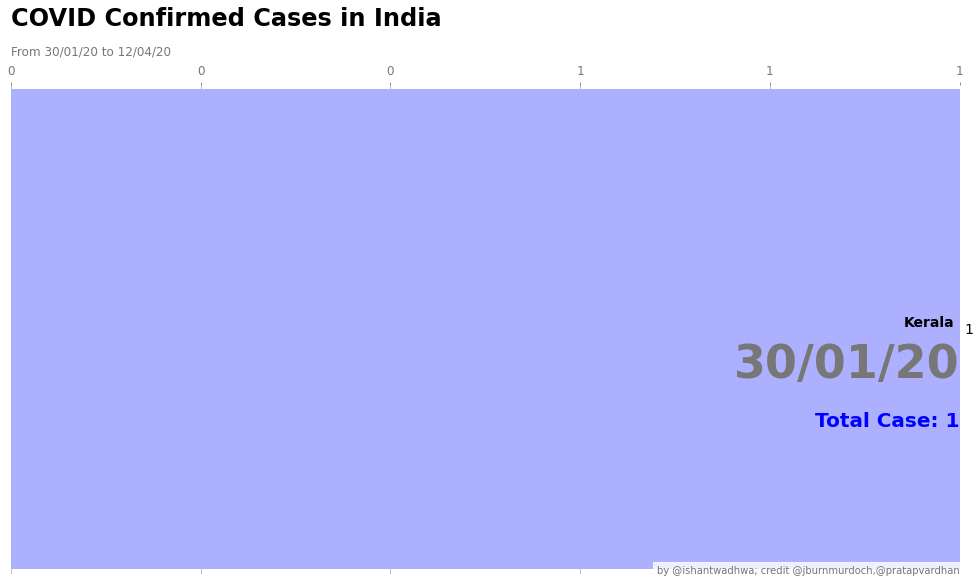

In [15]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(17, 9))
animator = animation.FuncAnimation(fig, draw_barchart, frames=data['Date'].unique())
animator.save('filename.mp4', fps=3, dpi=90,bitrate=100)
#HTML(animator.to_html5_video())


In [0]:
data[data['Date'] == '01/02/20']['Confirmed'].sum()

2